In [1]:
###############################
# Import measurements results #
###############################

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Array of colors according to RoofKIT color code
colarray = ['#89989A', '#C37246', '#4A5F31', '#4653A5', '#E2B01F', '#000000']


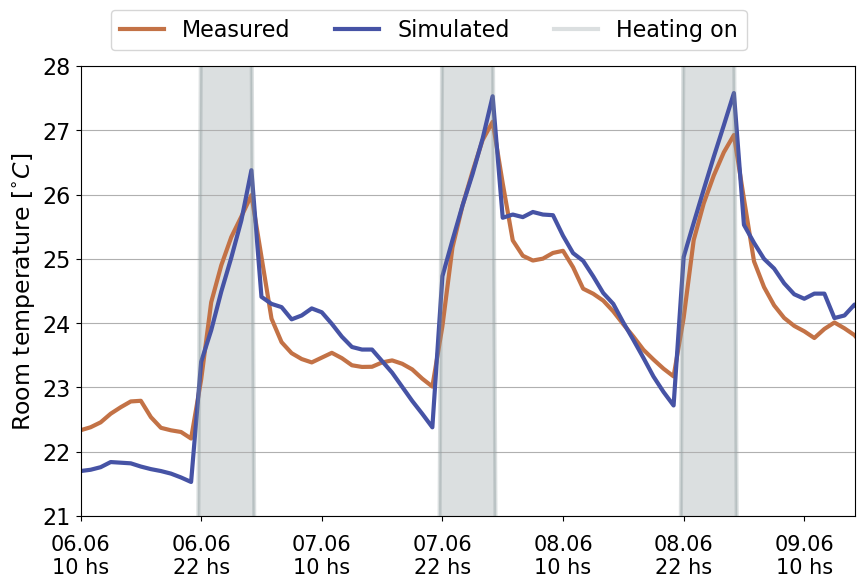

In [3]:
###########################
# Performance gap contest #
###########################

path_pgc = '../PGC/'
path_meas = 'HDU_heating_data_KIT.csv'
path_sim = 'Simroom_sim_data_KIT.csv'

res_pgc = {}

# load measurement csv data 
res_pgc['measurement'] = pd.read_csv(path_pgc+path_meas, sep=",", skiprows=0)
res_pgc['simulation'] = pd.read_csv(path_pgc+path_sim, sep=";", decimal= ',', skiprows=0)
res_pgc['measurement'].index = pd.to_datetime(res_pgc['measurement'].time,format='%Y-%m-%d %H:%M:%S')

#### Simulated vs measured room temperature
plot_pgc = pd.DataFrame({'Measured': res_pgc['measurement'].ma_temp.resample('60T').mean().values,
'Simulated': res_pgc['simulation'][(res_pgc['simulation'].Monat == 6) & (res_pgc['simulation']['Tag im Monat'] > 3) & (res_pgc['simulation']['Tag im Monat'] < 10)].Raumtemperatur.values,
'Heating': ((res_pgc['measurement'].meter0_power_L123.resample('60T').mean() > 500)*1).values})       

plot_pgc.index = res_pgc['measurement'].ma_temp.resample('60T').mean().index

# Plot
fig, ax = plt.subplots(figsize=[9,6])
plt.subplots_adjust(bottom=0.12, top = 0.87,
                    left = 0.11, right = 0.97) 
ax.yaxis.grid()
ax.plot(plot_pgc.Measured.index,plot_pgc.Measured,
         '-', c= colarray[1], linewidth = 3, label = "Measured")
ax.plot(plot_pgc.Simulated.index,plot_pgc.Simulated,
         '-', c= colarray[3], linewidth = 3, label = "Simulated")
ax.plot(plot_pgc.Heating.index,plot_pgc.Heating*29,
         '-', c= colarray[0], linewidth = 3, alpha = 0.3, label = "Heating on")
ax.fill_between(plot_pgc.Heating.index,plot_pgc.Heating*29, 
         color= colarray[0], alpha = 0.3)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m\n%H hs'))
ax.legend(fontsize = 16, ncol=3 , loc='upper center', 
        bbox_to_anchor=(0.45, 1.15), framealpha = 0.8)
ax.set_ylabel('Room temperature [$^{\circ}C$]', fontsize=17)
ax.tick_params(axis = 'y', labelsize = 16)
ax.tick_params(axis = 'x', labelsize = 15, pad = 10)
ax.set_ylim([21,28])
ax.set_xlim([plot_pgc.index[60], plot_pgc.index[-7]])     
fig.savefig('HDU_PGC.pdf',format='pdf',dpi=600)
fig.savefig('HDU_PGC.png',format='png',dpi=600)